## Importing necessary Libraries

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost.sklearn import XGBRegressor
import xgboost as xgb

## Storing the Dataset into the DataFrame train_data and test_data

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

## Checking the Shape of the DataFrame

In [3]:
train_data.shape

(550068, 12)

In [4]:
test_data.shape

(233599, 11)

## Checking Detailed information of both the Dataset

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


## Displaying the Columns

In [7]:
train_data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [8]:
test_data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [9]:
train_data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [10]:
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [11]:
train_data.isnull().sum()*100 / len(train_data)

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [12]:
test_data.isnull().sum()*100 / len(test_data)

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            30.969311
Product_Category_3            69.590195
dtype: float64

In [13]:
train_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [14]:
train_data['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [15]:
# Checking the mean Purchase of City_Category

gb=train_data.groupby('City_Category').mean()['Purchase']
gb

City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64

In [16]:
train_data['User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529])

In [17]:
train_data['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

# EDA

## Count according to the age group

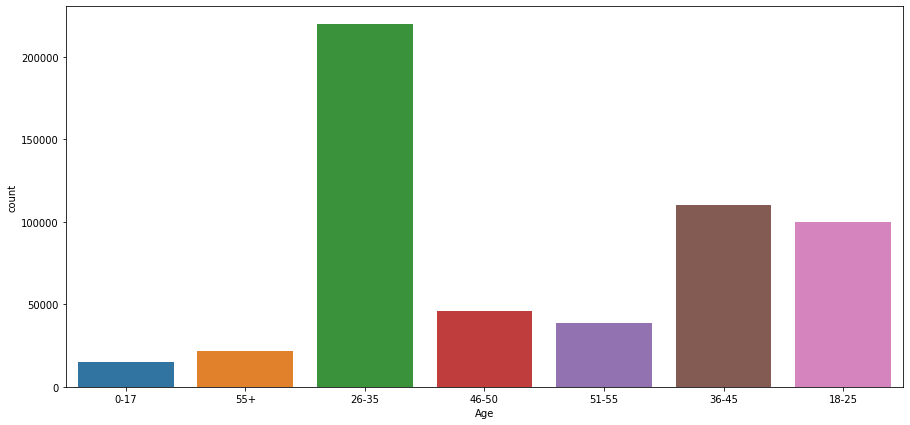

In [18]:
# The below plot shows the count of different age categories
plt.subplots(figsize=(15,7))
sns.countplot(train_data['Age'])

## Purchase According to different Age Categories

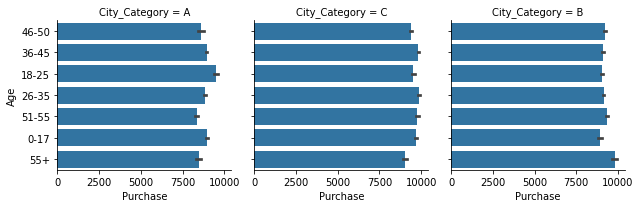

In [19]:
# The below plot shows the Purchase according to the age in different City_Category

g = sns.FacetGrid(train_data,col="City_Category")
g.map(sns.barplot,"Purchase","Age")

## Purchase Habits according to different city categories in terms of Gender

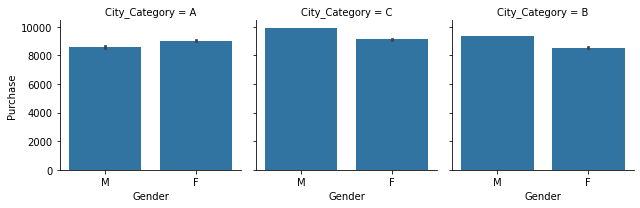

In [20]:
g = sns.FacetGrid(train_data,col="City_Category")
g.map(sns.barplot,"Gender","Purchase")

## Value Count according to the different City Category

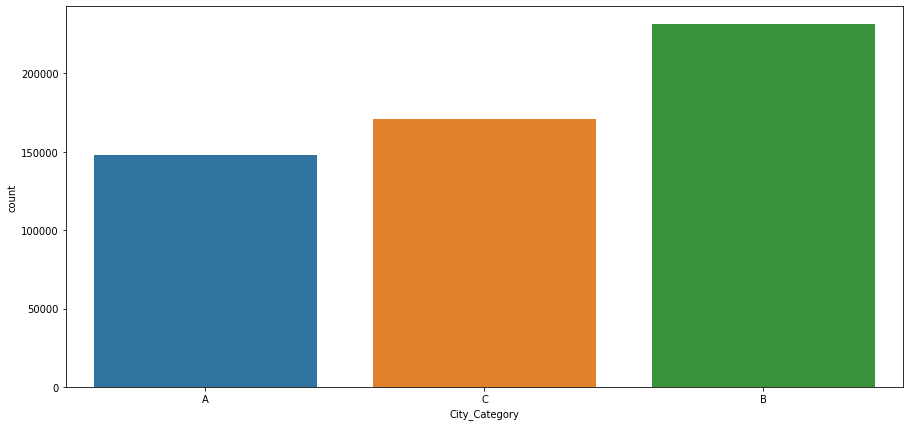

In [21]:
plt.subplots(figsize=(15,7))
sns.countplot(train_data['City_Category'])

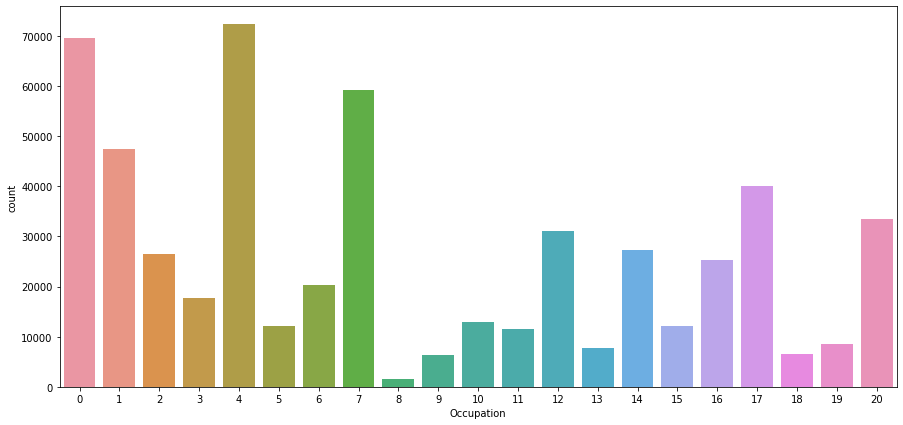

In [22]:
plt.subplots(figsize=(15,7))
sns.countplot(train_data['Occupation'])

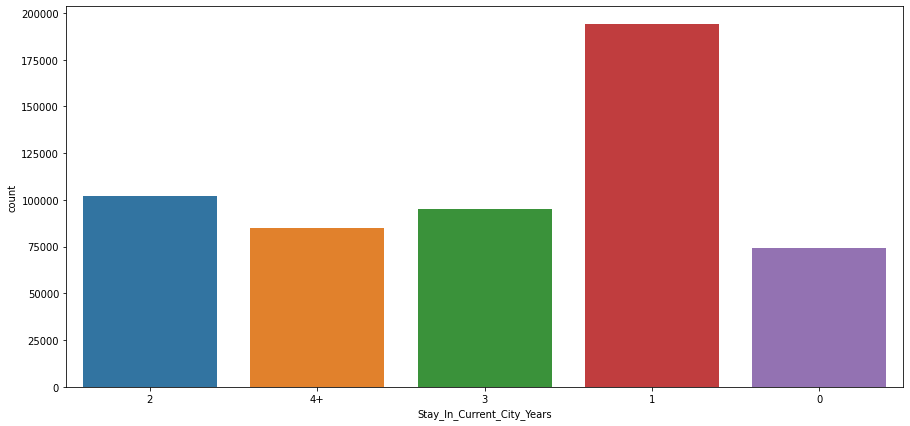

In [23]:
plt.subplots(figsize=(15,7))
sns.countplot(train_data['Stay_In_Current_City_Years'])

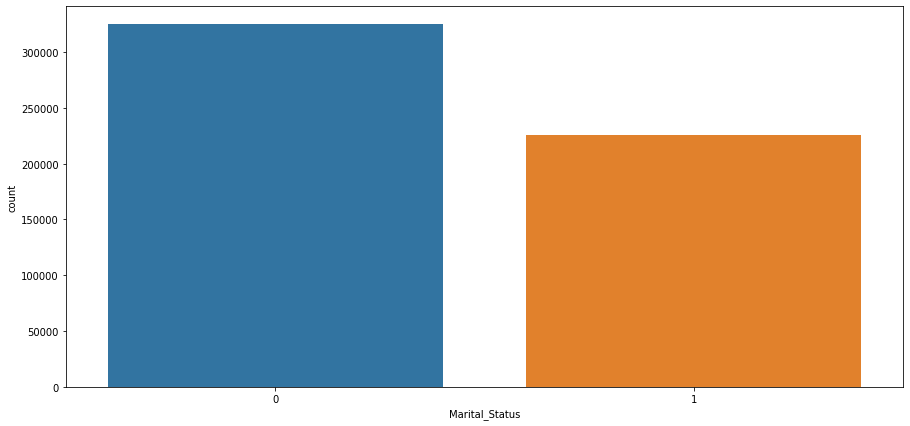

In [24]:
plt.subplots(figsize=(15,7))
sns.countplot(train_data['Marital_Status'])

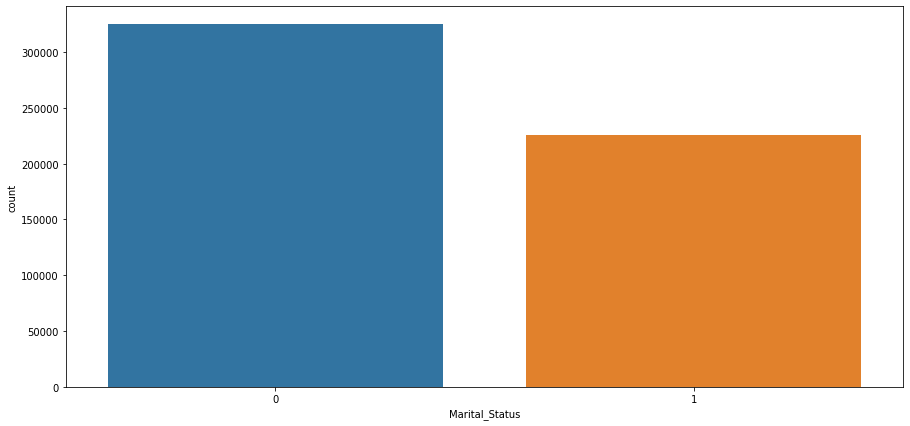

In [25]:
plt.subplots(figsize=(15,7))
sns.countplot(train_data['Marital_Status'])

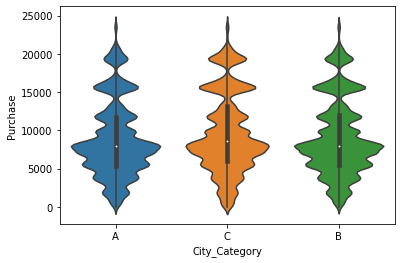

In [26]:
sns.violinplot(x='City_Category',y='Purchase',data=train_data)

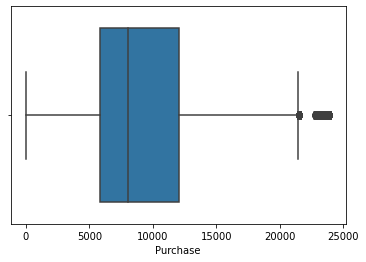

In [27]:
sns.boxplot(train_data['Purchase'])

In [28]:
train_data['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

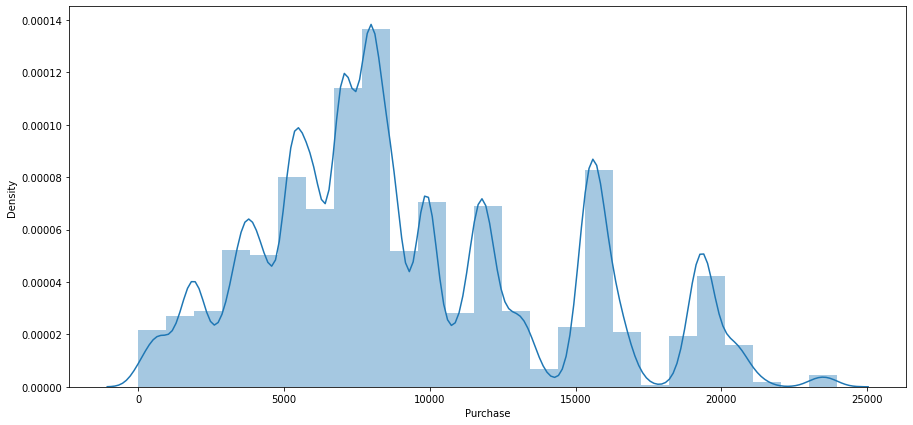

In [29]:
plt.figure(figsize=(15,7))
sns.distplot(train_data['Purchase'],bins=25)

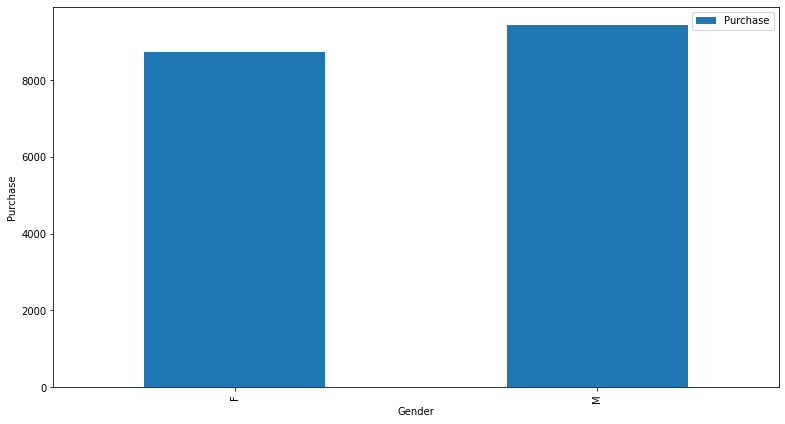

In [30]:
gp = train_data.pivot_table(index='Gender',values='Purchase')
gp.plot(kind='bar',figsize=(13,7),xlabel='Gender',ylabel='Purchase')

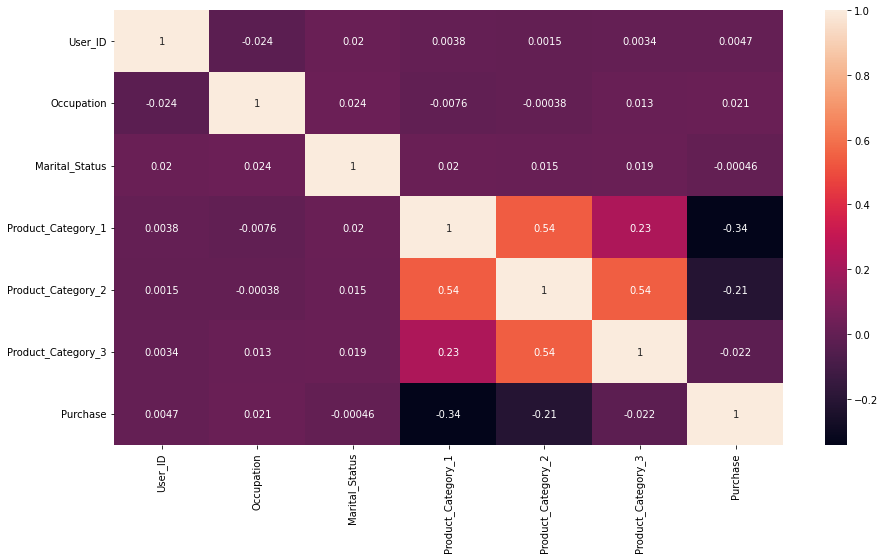

In [31]:
cr = train_data.corr()
sns.heatmap(cr,annot=True)
plt.gcf().set_size_inches(15,8)
#cr

## Filling null values

In [32]:
train_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [33]:
train_data['Product_Category_2']=train_data['Product_Category_2'].fillna(0).astype('int64')

#train_data['Product_Category_2']=train_data['Product_Category_2'].fillna(train_data['Product_Category_2'].mean()).astype('int64')

#train_data['Product_Category_2']=train_data['Product_Category_2'].fillna(train_data['Product_Category_2'].median()).astype('int64')

In [34]:
train_data['Product_Category_3']=train_data['Product_Category_3'].fillna(0).astype('int64')

#train_data['Product_Category_3']=train_data['Product_Category_3'].fillna(train_data['Product_Category_3'].mean()).astype('int64')

#train_data['Product_Category_3']=train_data['Product_Category_3'].fillna(train_data['Product_Category_3'].median()).astype('int64')

In [35]:
train_data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [36]:
df = train_data.copy()

## Applying Encoding on Categorical Variables

In [37]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [39]:
df['Gender'] = le.fit_transform(df['Gender'])

In [40]:
df['Age'] = le.fit_transform(df['Age'])

In [41]:
df['Age']

0         0
1         0
2         0
3         0
4         6
         ..
550063    5
550064    2
550065    2
550066    6
550067    4
Name: Age, Length: 550068, dtype: int64

In [42]:
df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1])

In [43]:
df['City_Category'] = le.fit_transform(df['City_Category'])

In [44]:
#df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])
df['Stay_In_Current_City_Years']=le.fit_transform(df['Stay_In_Current_City_Years'])

In [45]:
df =df.drop(["Product_ID"],axis=1)

In [46]:
df.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,0,0,10,0,2,0,3,0,0,8370
1,1000001,0,0,10,0,2,0,1,6,14,15200
2,1000001,0,0,10,0,2,0,12,0,0,1422
3,1000001,0,0,10,0,2,0,12,14,0,1057
4,1000002,1,6,16,2,4,0,8,0,0,7969


In [47]:
df.dtypes

User_ID                       int64
Gender                        int64
Age                           int64
Occupation                    int64
City_Category                 int64
Stay_In_Current_City_Years    int64
Marital_Status                int64
Product_Category_1            int64
Product_Category_2            int64
Product_Category_3            int64
Purchase                      int64
dtype: object

# Splitting the Dataset

In [48]:
x = df.drop(['Purchase'],axis=1)
y = df['Purchase']

In [49]:
x.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,0,0,10,0,2,0,3,0,0
1,1000001,0,0,10,0,2,0,1,6,14
2,1000001,0,0,10,0,2,0,12,0,0
3,1000001,0,0,10,0,2,0,12,14,0
4,1000002,1,6,16,2,4,0,8,0,0


In [50]:
y.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

In [51]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=123)

In [52]:
reg = [LinearRegression(),DecisionTreeRegressor(random_state=0),RandomForestRegressor(random_state=0),KNeighborsRegressor(n_neighbors = 10),XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)]
name= ["Linear Regression","Decision Tree Regressor","Random Forest Regressor","KNeighborsRegressor","Extreme Gradient Boost Algorithm"]
mse=[]
r2=[]
mean_abs_err=[]
rmse=[]
for i in range(len(reg)):
    reg[i].fit(X_train,Y_train)
    reg_pred = reg[i].predict(X_test)
    mse.append(mean_squared_error(Y_test,reg_pred))
    r2.append(r2_score(Y_test,reg_pred))
    mean_abs_err.append(mean_absolute_error(Y_test,reg_pred))
    rmse.append(sqrt(mean_squared_error(Y_test,reg_pred)))

[04:44:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [53]:
reg_df = pd.DataFrame({
    "Regression":name,
    "Mean Square Error":mse,
    "R2 Score":r2,
    "Mean Absolute Error":mean_abs_err,
    "Root Mean Square Error":rmse
})

In [54]:
reg_df

,Regression,Mean Square Error,R2 Score,Mean Absolute Error,Root Mean Square Error
0,Linear Regression,2.139828e+07,0.151912,3532.122980,4625.827595
1,Decision Tree Regressor,1.219534e+07,0.516657,2416.889790,3492.183329
2,Random Forest Regressor,8.893051e+06,0.647538,2163.338501,2982.121872
3,KNeighborsRegressor,1.761599e+07,0.301818,3080.489151,4197.140967
4,Extreme Gradient Boost Algorithm,7.840587e+06,0.689251,2084.621090,2800.104813


Since the R2 Score of Extreme Gradient Boost Algorithm is close to 0.7 which means that its showing highlevel of coorelation and the RMSE is 2995 which is lower as compared to other models so, we choose Extreme Gradient Boost Algorithm for prediction.

In [55]:
reg = xgb.XGBRegressor(learning_rate=0.3, max_depth=6, min_child_weight=40, seed=0)
reg.fit(X_train, Y_train)
predicted = reg.predict(X_test)
'''
final = pd.DataFrame()
final['Purchase'] = predicted
final['User_ID'] = train_data['User_ID']
final['Product_ID'] = train_data['Product_ID']
print(sqrt(mean_squared_error(Y_test,predicted)))
print(r2_score(Y_test,predicted))
'''


[04:44:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


"\nfinal = pd.DataFrame()\nfinal['Purchase'] = predicted\nfinal['User_ID'] = train_data['User_ID']\nfinal['Product_ID'] = train_data['Product_ID']\nprint(sqrt(mean_squared_error(Y_test,predicted)))\nprint(r2_score(Y_test,predicted))\n"

In [56]:
predicted

array([ 5213.0464,   622.2212, 13758.939 , ..., 13865.432 ,  2515.5098,
        7460.179 ], dtype=float32)

In [57]:
final = predicted
final = pd.Series(final,name="Purchase")

In [58]:
final

0          5213.046387
1           622.221191
2         13758.939453
3         15193.372070
4         14146.118164
              ...     
165016    13328.105469
165017     2805.383301
165018    13865.431641
165019     2515.509766
165020     7460.179199
Name: Purchase, Length: 165021, dtype: float32

In [59]:
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [60]:
data1=test_data.copy()
data1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [61]:
product=train_data["Product_ID"]

In [62]:
data1.drop("Product_ID",axis=1,inplace=True)

In [65]:
data1["Gender"]=le.fit_transform(data1["Gender"])
data1['City_Category']=le.fit_transform(data1["City_Category"])
data1['Age']=le.fit_transform(data1['Age'])
data1["Stay_In_Current_City_Years"]=le.fit_transform(data1["Stay_In_Current_City_Years"])

In [66]:
data1.dtypes

User_ID                         int64
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

In [68]:
predicted = reg.predict(data1)

In [69]:
predicted

array([14667.563 , 10098.35  ,  7191.8364, ..., 12373.099 , 19554.959 ,
        2520.3171], dtype=float32)

In [77]:
final=predicted

In [78]:
test_data["Purchase"]=final

In [80]:
test_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,14667.563477
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,10098.349609
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,7191.836426
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,2985.997070
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,2149.835449
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,7018.988281
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,6014.822754
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,12373.098633
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,19554.958984


In [82]:
final_csv=test_data[["Purchase","User_ID","Product_ID"]]

In [83]:
final_csv.to_csv("SampleSubmission.csv")